"Gold standard" reference lists of MWEs, ranked for compositionality.
As used in Roberts & Egg (2018).

* __F_ENC__: Farahmand et al, 2015. __[farahmand_comp_data]__
 * 1042 noun compounds
 * 5 binary judgements -> Likert scale
* __R_ENC__: Reddy et al, 2011. __[reddy_comp_data]__
 * 90 noun compounds
 * Mechanical Turk, 6 binary judgements -> Likert
* __MC_VPC__: McCarthy et al 2003. __[mccarthy_comp_vpc]__
 * 117 verb-particle pairs
 * 3 judges, avergaed scores on 11-point scale.
* __D_ADJN__: Biemann and Giesbrecht. __[disco_2011]__
 * 68 Adj-NN compounds from (training and validation) for Disco 2011.
 * Mechanical Turk, 11-point scale.
* __MC_VN__: McCarthy et al 2007.  __[mccarthy_comp_vn]__
 * 638 verb-object pairs
 * 2 judges, 6-point scale.

In [1]:
import os

path = 'C:/Users/'+os.getlogin()+'/Google Drive/University/Dissertation'
datapath = 'C:/Users/'+os.getlogin()+'/Dissertation Data'
#datapath = 'E:/Dissertation Data'

os.chdir(path)
os.getcwd()

'C:\\Users\\tom\\Google Drive\\University\\Dissertation'

In [2]:
import pandas as pd
import numpy as np

In [3]:
def exp_to_tuple(exp,sep=' '):
    return tuple(exp.split(sep))

In [4]:
# Import Farahmand et al's list of compound nouns - 1042

F_ENC = pd.read_csv(path+'/Data/Gold Standards/en_ncs_noncompositional_conventionalized/instances_judgments/comb-judgements.csv')

F_ENC['noncomp_score'] = F_ENC[['noncomp_1', 'noncomp_2', 'noncomp_3', 'noncomp_4']].sum(axis=1)

F_ENC = F_ENC[['compound', 'noncomp_score']].sort_values('noncomp_score', ascending=False).rename(columns={'compound' : 'mwe', 'noncomp_score' : 'gs_score'}).reset_index(drop=True)

F_ENC['mwe'] = F_ENC.mwe.apply(exp_to_tuple)

F_ENC

,mwe,gs_score
0,"(academy, award)",4
1,"(hard, disk)",4
2,"(goose, bumps)",4
3,"(grass, roots)",4
4,"(greenhouse, gas)",4
...,...,...
1037,"(graduation, day)",0
1038,"(grain, requirements)",0
1039,"(grape, leaves)",0
1040,"(belief, system)",0


In [5]:
# Import Reddy et al's noun compounds

R_ENC = pd.read_csv(path+'/Data/Gold Standards/ijcnlp_compositionality_data/MeanAndDeviations.clean.txt',
                   sep = "\s+").reset_index()

def subber(s):
    return s[:-2]

R_ENC['mwe'] = R_ENC['index'].apply(subber) + ' ' + R_ENC['#word'].apply(subber)
R_ENC['gs_score'] = 5 - R_ENC.Cpd_mean

R_ENC = R_ENC[['mwe' , 'gs_score']].sort_values('gs_score', ascending = False).reset_index(drop=True)

R_ENC['mwe'] = R_ENC.mwe.apply(exp_to_tuple)

R_ENC

,mwe,gs_score
0,"(gravy, train)",4.689655
1,"(cloud, nine)",4.666667
2,"(ivory, tower)",4.535714
3,"(melting, pot)",4.461538
4,"(silver, bullet)",4.333333
...,...,...
85,"(speed, limit)",0.172414
86,"(swimming, pool)",0.133333
87,"(graduate, student)",0.100000
88,"(engine, room)",0.068966


In [6]:
# MC_VPC
MC_VPC1 = pd.read_csv(path+'/Data/Gold Standards/vpc_comp_mccarthy/Judge1',
                   sep = '\s*\:\s*', header = None, index_col=0,
                      na_values = '?', engine='python'
                     ).reset_index(drop=True).drop_duplicates()   # Duplicate entry for "look+up" - removed

MC_VPC1.columns= ['mwe', 'freq', 'comp1']
#MC_VPC1['comp1'] = MC_VPC1.comp1.astype(float)

MC_VPC2 = pd.read_csv(path+'/Data/Gold Standards/vpc_comp_mccarthy/Judge2',
                   sep = '\s*\:\s*', header = None, index_col=0,
                      na_values = '?', engine='python'
                     ).reset_index(drop=True).drop_duplicates()

MC_VPC2.columns= ['mwe', 'freq', 'comp2']

MC_VPC3 = pd.read_csv(path+'/Data/Gold Standards/vpc_comp_mccarthy/Judge3',
                   sep = '\s*\:\s*', header = None, index_col=0,
                      na_values = '?', engine='python'
                     ).reset_index(drop=True).drop_duplicates()

MC_VPC3.columns= ['mwe', 'freq', 'comp3']

MC_VPC = MC_VPC1.merge(MC_VPC2,on=['mwe', 'freq']).merge(MC_VPC3,on=['mwe', 'freq'])

MC_VPC['gs_score'] = 10 - MC_VPC[['comp1', 'comp2', 'comp3']].mean(axis=1, skipna=True)

MC_VPC = MC_VPC.sort_values('gs_score', ascending = False)[['mwe','gs_score']].reset_index(drop=True)

MC_VPC['mwe'] = MC_VPC.mwe.apply(exp_to_tuple, sep='+')

MC_VPC

,mwe,gs_score
0,"(cock, up)",9.333333
1,"(whip, off)",8.500000
2,"(space, out)",8.333333
3,"(stave, off)",8.333333
4,"(write, off)",8.333333
...,...,...
111,"(step, out)",1.333333
112,"(lie, down)",1.000000
113,"(pull, down)",0.333333
114,"(see, down)",0.000000


In [7]:
D_ADJN_test = pd.read_csv(path+'/Data/Gold Standards/DISCo 2011/english/num_scores/DISCo_num_EN_test.tsv',
                   sep = '\t', header = None
                     ).reset_index(drop=True)
D_ADJN_test.columns = ['class', 'mwe', 'gs_score']

# Only interested in ADJ_NN compounds
D_ADJN_test = D_ADJN_test[D_ADJN_test['class'] == 'EN_ADJ_NN'].drop('class', axis=1)



D_ADJN_train = pd.read_csv(path+'/Data/Gold Standards/DISCo 2011/english/num_scores/DISCo_num_EN_train.tsv',
                   sep = '\t', header = None
                     ).reset_index(drop=True)
D_ADJN_train.columns = ['class', 'mwe', 'gs_score']

# Only interested in ADJ_NN compounds
D_ADJN_train = D_ADJN_train[D_ADJN_train['class'] == 'EN_ADJ_NN'].drop('class', axis=1)


D_ADJN = D_ADJN_train.append(D_ADJN_test)

D_ADJN['gs_score'] = 100 - D_ADJN.gs_score

D_ADJN = D_ADJN.sort_values('gs_score', ascending = False).reset_index(drop=True)

D_ADJN['mwe'] = D_ADJN.mwe.apply(exp_to_tuple)

D_ADJN

,mwe,gs_score
0,"(blue, chip)",89
1,"(red, tape)",89
2,"(second, hand)",86
3,"(right, wing)",84
4,"(smart, card)",82
...,...,...
130,"(short, distance)",3
131,"(early, version)",2
132,"(small, island)",2
133,"(olive, oil)",1


In [8]:
MC_VN = pd.read_csv(path+'/Data/Gold Standards/emnlp2007data.txt',
                   sep = '\t', header = None
                     ).reset_index(drop=True)
MC_VN.columns = ['mwe', 'judge1', 'judge2']

MC_VN['gs_score'] = 6- MC_VN[['judge1', 'judge2']].mean(axis=1)

MC_VN = MC_VN[['mwe','gs_score']].sort_values('gs_score', ascending=False).reset_index(drop=True)

MC_VN['mwe'] = MC_VN.mwe.apply(exp_to_tuple)

MC_VN

,mwe,gs_score
0,"(have, heart)",5.0
1,"(catch, eye)",5.0
2,"(take, step)",5.0
3,"(take, root)",5.0
4,"(leave, mark)",5.0
...,...,...
633,"(eat, food)",0.0
634,"(pay, amount)",0.0
635,"(buy, house)",0.0
636,"(discuss, problem)",0.0


In [9]:
# R&E's own outputs

robegg = open(path+'/Data/RobertsEgg/MWE_en-filtered.utf8.txt', 'r', encoding='utf-8')

for lines in range(10):
    print(robegg.readline())

compo	assoc	mwe	words

-2	36.4506646641	")− 1

-2	28.826415177	"— weiler

-2	22.6054361674	"—&# X200B

-2	22.8166041032	$11.6 million

-2	27.2593711387	$23.5 million

-2	24.1214802321	$24.5 million

-2	28.2280390416	$25.5 million

-2	24.394108659	$28.5 million

-2	22.9419298938	$297.00. Poços



In [10]:
with open(path+'/Data/RobertsEgg/MWE_en-unfiltered.utf8.txt', 'r', encoding='utf-8') as robegg:
    robegg_df = pd.read_csv(robegg, names=['compo', 'assoc', 'mwe', 'w1', 'w2', 'w3'], 
                              delimiter='\t', na_values = ['--'], quoting=3, skiprows=1, skipinitialspace=True)

# Remove negative compositionality scores - R&E's filter
#robegg_df = robegg_df[robegg_df.compo >= -1].reset_index(drop=True)

robegg_df['mwe'] = robegg_df.mwe.apply(exp_to_tuple)

robegg_df

,compo,assoc,mwe,w1,w2,w3
0,-0.216884,452.575930,"(this, individual, as)",NaN,-0.216884,NaN
1,-0.177191,1291.822316,"(that, in, humans)",NaN,NaN,-0.177191
2,-0.161933,191.902424,"(individual, as, the)",-0.161933,NaN,NaN
3,-0.160100,49.378076,"(It, returned, one)",NaN,-0.160100,NaN
4,-0.144707,48.891020,"(had, two, more)",NaN,NaN,-0.144707
...,...,...,...,...,...,...
917642,0.941358,407.051275,"(Avenue, and)",0.941358,NaN,NaN
917643,0.944386,3105.318760,"(whether, or, not)",0.944386,NaN,NaN
917644,0.946745,143.658118,"(Records, and)",0.946745,NaN,NaN
917645,0.946882,67.013677,"(މ, ަ)",0.936615,0.957148,NaN


In [11]:
from scipy.stats import spearmanr

def spmr(a,b):
    return spearmanr(a,b,nan_policy='omit')[0]

In [12]:
def corr_with_gs(inframe, scorecol, gsframe, refscore='gs_score', mult=-1):
    
    if str(inframe) == str(gsframe) and scorecol == refscore:
        return (len(inframe), 1.0, 1.0)
    
    _intersection = inframe[['mwe', scorecol]].merge(gsframe[['mwe', refscore]], on='mwe', how='inner')

    _overlap = len(_intersection)
    if _overlap:
        c_pears = _intersection[scorecol].corr(_intersection[refscore], method="pearson")
        c_spear = _intersection[scorecol].corr(_intersection[refscore], method="spearman")
    else:
        c_pears = np.nan
        c_spear = np.nan
        
    return (_overlap, mult*c_spear, mult*c_pears)

In [13]:
corr_with_gs(robegg_df,'compo', F_ENC)

(631, 0.45766406237623103, 0.4731464452807858)

In [190]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1)
          }

In [194]:
RE_results = {}

for gs in gs_dict.keys():
    RE_results[gs] = corr_with_gs(robegg_df,'compo', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1])
    
RE_results

{'F_ENC': (631, 0.45766406237623103, 0.4731464452807858),
 'R_ENC': (61, 0.6148618326919655, 0.6030799131312388),
 'MC_VPC': (47, 0.4244468935228092, 0.37201218083660564),
 'D_ADJN': (118, 0.5282258091736578, 0.6049064597349989),
 'MC_VN': (132, 0.39246363536118933, 0.3953395569989328),
 'RE_WIKI15': (917647, 1.0, 1.0)}

In [14]:
# Import my results. Converter interprets the strings in 'ngram' as tuples.

converter = {'ngram' : eval,
             #'stopwords' : eval
             #'mwe_vector' : eval,
             #'component_vectors' : eval,
             #'base_nearest' : eval,
             #'mwe_nearest' : eval,
            }

simp_res = pd.read_csv(datapath+'/Models/1 w2v/Results/simple_light_001.csv', 
                       converters= converter
                      )

In [15]:
simp_res[simp_res.ngram == ('Ving', 'Rhames')]

,ngram,freq,poisson,len,batch,stopwords,cosine_sim,base_nearest,mwe_nearest,component_cosims
145378,"(Ving, Rhames)",20,-605.62559,2,1,"[-1, -1]",NaN,"[[], []]","[('Jennifer+Connelly', 0.9467509388923645), ('...",NaN


In [16]:
simp_res = simp_res[~np.isnan(simp_res.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe'}).reset_index(drop=True)

simp_res

,mwe,freq,poisson,len,batch,stopwords,cosine_sim,base_nearest,mwe_nearest,component_cosims
0,"(and, finally, the)",33,-2347.493609,3,4,"[1, 0, 1]",-0.166870,"[[('but', 0.46513259410858154), ('which', 0.46...","[('Archeology', 0.7114355564117432), ('It+serv...",NaN
1,"(was, born, here)",32,-2114.989504,3,7,"[1, 1, 0]",-0.162483,"[[('is', 0.599123477935791), ('became', 0.4980...","[('né', 0.8346260786056519), ('Swiss-born', 0....",NaN
2,"(and, most, recently)",39,-2537.673195,3,6,"[1, 0, 0]",-0.155851,"[[('which', 0.48842793703079224), ('but', 0.48...","[('Videography', 0.767510712146759), ('Demos',...",NaN
3,"(is, both, the)",35,-2568.582045,3,5,"[1, 0, 1]",-0.150264,"[[('was', 0.5867345333099365), ('are', 0.47631...","[('is+the+5th', 0.81363844871521), ('is+the+2n...",NaN
4,"(die, was)",37,-1847.535848,2,2,"[0, 1]",-0.149292,"[[('hurt', 0.6130431294441223), ('dying', 0.61...","[('two+terms+as', 0.676414966583252), ('Leahy'...",NaN
...,...,...,...,...,...,...,...,...,...,...
144241,"(increment:1000, start:0, ScaleMinor)",36,-1604.864335,3,5,"[0, 0, 0]",0.970057,"[[('increment:2500+start:0+BackgroundColors', ...","[('increment:500+start:0+BackgroundColors', 0....",NaN
144242,"(Maerz, and)",49,-2300.898593,2,3,"[0, 1]",0.973944,"[[('Maerz+and', 0.9739437103271484), ('PerBang...","[('Maerz', 0.9739437103271484), ('PerBang.dk',...",NaN
144243,"(increment:50000, start:0, ScaleMinor)",46,-2038.355890,3,5,"[0, 0, 0]",0.981962,"[[('increment:50000+start:0+ScaleMinor', 0.995...","[('increment:25000', 0.9958760738372803), ('in...",NaN
144244,"(increment:5000, start:0, ScaleMinor)",39,-1740.630231,3,5,"[0, 0, 0]",0.988815,"[[('increment:10000+start:0+ScaleMinor', 0.996...","[('increment:2500+start:0+BackgroundColors', 0...",NaN


In [18]:
_intersection = simp_res[['mwe', 'cosine_sim']].merge(F_ENC[['mwe', 'gs_score']], on='mwe', how='inner')

_intersection

,mwe,cosine_sim,gs_score
0,"(think, tank)",-0.057947,4
1,"(shot, put)",0.078355,4
2,"(business, man)",0.100572,0
3,"(zip, code)",0.109985,4
4,"(death, notice)",0.119624,0
...,...,...,...
174,"(bony, fish)",0.658802,0
175,"(bone, marrow)",0.695847,2
176,"(computer, graphics)",0.697044,0
177,"(user, interfaces)",0.699174,0


In [19]:
simp_results = {}

for gs in gs_dict.keys():
    simp_results[gs] = corr_with_gs(simp_res,'cosine_sim', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1])
    
simp_results

{'F_ENC': (179, 0.16900511558221146, 0.2266139516442704),
 'R_ENC': (14, 0.25742589834812624, 0.32273373982276454),
 'MC_VPC': (15, 0.317418680589857, 0.3982565602882032),
 'D_ADJN': (35, 0.3160327869728299, 0.3256332049836874),
 'MC_VN': (39, 0.35364516259778517, 0.3814778730388503),
 'RE_WIKI15': (78450, 0.5720558616193345, 0.5875556757796179)}

In [14]:
# GloVe results - simple Wiki, unrestricted vocabulary

# Import my results. Converter interprets the strings in 'ngram' as tuples.

converter = {'ngram' : eval,
             #'stopwords' : eval
             #'mwe_vector' : eval,
             #'component_vectors' : eval,
             #'base_nearest' : eval,
             #'mwe_nearest' : eval,
            }

simp_glv = pd.read_csv(datapath+'/Models/2 GloVe/Results/simple_light_001.csv', 
                       converters= converter
                      )

In [18]:
simp_glv = simp_glv[~np.isnan(simp_glv.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_sg'}).reset_index(drop=True)

simp_glv

,mwe,freq,poisson,len,batch,stopwords,component_cosims,cosim_sg
0,"(at, SourceWatch)",29,-1242.296116,2,1,"[1, 0]","[nan, -0.6189176361829742]",-0.618918
1,"(Verde, River)",21,-934.113534,2,1,"[0, 0]","[-0.27860416326513254, -0.9082974293747117]",-0.593451
2,"(Preto, River)",26,-1082.078752,2,1,"[0, 0]","[-0.05813242429839234, -0.9069972245533662]",-0.482565
3,"(B-2, B-2)",23,-781.295338,2,1,"[0, 0]","[-0.4782236263161076, -0.4782236263161076]",-0.478224
4,"(a, sex-ratio)",39,-1756.174658,2,1,"[1, 0]","[nan, -0.42406098156680977]",-0.424061
...,...,...,...,...,...,...,...,...
148280,"(Bidi, Bom)",28,-933.795170,2,2,"[0, 0]","[0.9441158251036129, 0.8859746218160154]",0.915045
148281,"(OppositionScore, OppositionScore)",24,-752.985334,2,1,"[0, 0]","[0.9284973927698434, 0.9284973927698434]",0.928497
148282,"(Yuta, Iyama, Yuta)",27,-1035.776620,3,3,"[0, 0, 0]","[0.9354143888603338, 0.980728978874779, 0.9354...",0.950519
148283,"(Iyama, Yuta, Iyama)",27,-1026.568623,3,2,"[0, 0, 0]","[0.966807948593367, 0.9500962208719715, 0.9668...",0.961237


In [22]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1)
          }

In [23]:
simp_glv_results = {}

for gs in gs_dict.keys():
    simp_glv_results[gs] = corr_with_gs(simp_glv,'cosim_sg', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1])
    
simp_glv_results

{'F_ENC': (183, 0.19986376897663682, 0.20773553444203452),
 'R_ENC': (15, 0.2688189310247452, 0.2723645884130369),
 'MC_VPC': (15, 0.4941631731910273, 0.49193412582831303),
 'D_ADJN': (37, 0.1005454142569217, 0.11767659072767978),
 'MC_VN': (39, 0.11969056024227298, 0.1419407558422395),
 'RE_WIKI15': (80968, 0.4164275225051317, 0.4277863577214681),
 'W2V_SIMP20': (144246, 0.5291095701871602, 0.5427681563990115)}

In [24]:
# 10% Wiki results - w2v

In [15]:
w10p_w2v = pd.read_csv(datapath+'/Models/1 w2v/Results/wiki10pc_light_001.csv', 
                       converters= converter
                      )

In [16]:
w10p_w2v = w10p_w2v[~np.isnan(w10p_w2v.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_10w'}).reset_index(drop=True)

In [17]:
w10p_w2v

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w
0,"(1980s, 1970s, 1960s)",504.762099,3,8,"[0, 0, 0]","[-0.23996054, -0.23782371, -0.2340202]",-0.237268
1,"(amongst, many, others)",712.565055,3,1,"[0, 0, 0]","[-0.15940933, -0.21269974, -0.19618905]",-0.189433
2,"(European, register, of)",588.560764,3,1,"[0, 0, 1]","[-0.1621425, -0.21278596, nan]",-0.187464
3,"(1950s, 1940s, 1930s)",576.491489,3,10,"[0, 0, 0]","[-0.18906975, -0.1606813, -0.19921347]",-0.182988
4,"(As, far, back)",449.645748,3,3,"[0, 0, 0]","[-0.09595686, -0.2087354, -0.24125503]",-0.181982
...,...,...,...,...,...,...,...
453464,"(宿, け/犬)",416.659769,2,2,"[0, 0]","[0.9859951, 0.9874592]",0.986727
453465,"(ㄴ, ㄹ)",4110.216943,2,5,"[0, 0]","[0.98334867, 0.99101293]",0.987181
453466,"(ㄹ, ㅁ)",3227.287802,2,6,"[0, 0]","[0.99340194, 0.98948646]",0.991444
453467,"(ㄹ, ㅁ, ㅂ)",5594.044824,3,4,"[0, 0, 0]","[0.9960094, 0.99351, 0.9925519]",0.994024


In [28]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1),
           'GLV_SIMP20': (simp_glv,'cosim_sg',1),
          }

In [29]:
w10p_w2v_results = {}

for gs in gs_dict.keys():
    w10p_w2v_results[gs] = corr_with_gs(w10p_w2v,'cosim_10w', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1])
    
w10p_w2v_results

{'F_ENC': (485, 0.40369847744695897, 0.40136775177572015),
 'R_ENC': (39, 0.6235318453917169, 0.632296906717712),
 'MC_VPC': (27, 0.5363561639361227, 0.4756825053310645),
 'D_ADJN': (96, 0.59475192551258, 0.6244823396121152),
 'MC_VN': (71, 0.3886935238656132, 0.36587108186036554),
 'RE_WIKI15': (348081, 0.8523189690810751, 0.86377076799552),
 'W2V_SIMP20': (68625, 0.6974530711445045, 0.713935716686151),
 'GLV_SIMP20': (70783, 0.4586493061587788, 0.469378173165911)}

In [30]:
# 10% Wiki results - GloVe

In [22]:
w10p_glv = pd.read_csv(datapath+'/Models/2 GloVe/Results/w10p_vocab_light_001.csv', 
                       converters= converter
                      )

In [23]:
w10p_glv = w10p_glv[~np.isnan(w10p_glv.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_10g'}).reset_index(drop=True)

In [24]:
len(w10p_glv)

469496

In [34]:
indexer = 350

w10p_glv[indexer:indexer+10]

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10g
350,"(Mecklenburgische, Seenplatte)",596.830947,2,1,"[0, 0]","[-0.9144060728332588, -0.9996280050142409]",-0.957017
351,"(Barks, Barks)",3424.380014,2,1,"[0, 0]","[-0.9569117169022829, -0.9569117169022829]",-0.956912
352,"(the, AIF)",526.799239,2,2,"[1, 0]","[nan, -0.9568297630738632]",-0.956830
353,"(one, of, cycling's)",535.732828,3,2,"[1, 1, 0]","[nan, nan, -0.9564234148402628]",-0.956423
354,"($0, $0)",1209.985489,2,2,"[0, 0]","[-0.9561700953136205, -0.9561700953136205]",-0.956170
355,"(also, partook, in)",554.352827,3,5,"[1, 0, 1]","[nan, -0.9559022570081053, nan]",-0.955902
356,"(Compendium, of, the)",797.677895,3,7,"[0, 1, 1]","[-0.9558656733050421, nan, nan]",-0.955866
357,"(at, Sing, Sing)",544.947593,3,4,"[1, 0, 0]","[nan, -0.9551582094016836, -0.9551582094016836]",-0.955158
358,"(an, intruder)",396.140415,2,1,"[1, 0]","[nan, -0.9541732878519662]",-0.954173
359,"(Tír, Chonaill)",651.791496,2,1,"[0, 0]","[-0.9344770211789837, -0.973829094009777]",-0.954153


In [35]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1),
           'GLV_SIMP20': (simp_glv,'cosim_sg',1),
           'W2V_W10P'  : (w10p_w2v,'cosim_10w',1),
          }

In [36]:
w10p_glv_results = {}

for gs in gs_dict.keys():
    w10p_glv_results[gs] = corr_with_gs(w10p_glv,'cosim_10g', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1])
    
w10p_glv_results

{'F_ENC': (486, -0.042852053735551135, -0.07488654020482376),
 'R_ENC': (39, 0.47266103512317864, 0.4154294507697753),
 'MC_VPC': (27, -0.12184346646494112, -0.22874320230855222),
 'D_ADJN': (96, 0.07845678132260736, 0.03719782516807676),
 'MC_VN': (71, -0.1878012515031023, -0.21855611106945236),
 'RE_WIKI15': (352671, 0.12621525640089246, 0.14173770393295657),
 'W2V_SIMP20': (68649, 0.11966791836396079, 0.10634576421103638),
 'GLV_SIMP20': (71128, 0.15220184583363472, 0.14947602265165055),
 'W2V_W10P': (453469, 0.14067183156467417, 0.16024308765745982)}

In [37]:
_intersection = w10p_glv[['mwe', 'cosim_10g']].merge(simp_glv[['mwe', 'cosim_sg']], on='mwe', how='inner')

In [38]:
_intersection.iloc[170:190]

,mwe,cosim_10g,cosim_sg
170,"(this, name, is)",-0.747535,0.237143
171,"(who, wrote, about)",-0.745871,0.073583
172,"(as, bishop, of)",-0.745122,0.244085
173,"(an, exploratory)",-0.744440,0.343694
174,"(of, Galicia)",-0.740779,0.115502
175,"(analogous, to, the)",-0.737385,0.211327
176,"(their, opinions)",-0.737031,0.368862
177,"(They, are, still)",-0.736980,0.164968
178,"(devices, can)",-0.736592,0.243913
179,"(A, Very)",-0.736303,0.240524


In [39]:
w10p_glv[w10p_glv.mwe == ('partial', 'differential', 'equations')]



,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10g
65325,"(partial, differential, equations)",4490.136314,3,2,"[0, 0, 0]","[-0.07024656805822105, 0.021631354220752186, -...",-0.122656


In [40]:
simp_glv[simp_glv.mwe == ('partial', 'differential', 'equations')]

,mwe,freq,poisson,len,batch,stopwords,component_cosims,cosim_sg
36305,"(partial, differential, equations)",38,-1759.593105,3,4,"[0, 0, 0]","[0.02645862284665961, 0.11775227437654526, 0.2...",0.132924


In [25]:
# GloVe results - simple Wiki, RESTRICTED vocabulary

# Import my results. Converter interprets the strings in 'ngram' as tuples.

converter = {'ngram' : eval,
             #'stopwords' : eval
             #'mwe_vector' : eval,
             #'component_vectors' : eval,
             #'base_nearest' : eval,
             #'mwe_nearest' : eval,
            }

simp_glv_v = pd.read_csv(datapath+'/Models/2 GloVe/Results/simple_vocab_light_001.csv', 
                       converters= converter
                      )

In [26]:
simp_glv_v = simp_glv_v[~np.isnan(simp_glv_v.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_sgv'}).reset_index(drop=True)

simp_glv_v

,mwe,freq,poisson,len,batch,stopwords,component_cosims,cosim_sgv
0,"(the, highest-rated)",22,-1025.646943,2,1,"[1, 0]","[nan, -0.9999907006105433]",-0.999991
1,"(was, facelifted, in)",24,-1540.866708,3,5,"[1, 0, 1]","[nan, -0.9999871461769124, nan]",-0.999987
2,"(the, station's)",44,-2069.249614,2,1,"[1, 0]","[nan, -0.9999648035199541]",-0.999965
3,"(in, the, shade)",21,-1431.207176,3,2,"[1, 1, 0]","[nan, nan, -0.9999537329974788]",-0.999954
4,"(The, Comunità)",36,-1639.428758,2,1,"[1, 0]","[nan, -0.9999526702180579]",-0.999953
...,...,...,...,...,...,...,...,...
148863,"(to, wrestle)",31,-1416.572965,2,1,"[1, 0]","[nan, 0.9999743768488101]",0.999974
148864,"(reside, in)",32,-1465.700990,2,1,"[0, 1]","[0.9999752572980569, nan]",0.999975
148865,"(a, towel)",21,-962.909113,2,1,"[1, 0]","[nan, 0.9999766276509143]",0.999977
148866,"(of, the, Dinosaurs)",26,-1780.594652,3,2,"[1, 1, 0]","[nan, nan, 0.9999769781562247]",0.999977


In [43]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1),
           'GLV_SIMP20': (simp_glv,'cosim_sg',1),
           'W2V_W10P'  : (w10p_w2v,'cosim_10w',1),
           'GLV_W10P'  : (w10p_glv,'cosim_10g',1),
          }

In [44]:
simp_glv_v_results = {}

for gs in gs_dict.keys():
    simp_glv_v_results[gs] = corr_with_gs(simp_glv_v,'cosim_sgv', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1])
    
simp_glv_v_results

{'F_ENC': (183, -0.028892215973259066, -0.13525896094870307),
 'R_ENC': (15, -0.06093229103227559, 0.07427829488546667),
 'MC_VPC': (15, -0.0144281218449935, 0.17759491177934036),
 'D_ADJN': (37, 0.23381551522953967, 0.23073371663811262),
 'MC_VN': (39, -0.008498132164335892, -0.2566869064816917),
 'RE_WIKI15': (81081, 0.00947873270389384, 0.020010744276103543),
 'W2V_SIMP20': (144246, 0.07848422019334184, 0.08776046958566204),
 'GLV_SIMP20': (148285, 0.10481490273434138, 0.13636006976996365),
 'W2V_W10P': (70826, 0.030548376718197233, 0.04445008092723402),
 'GLV_W10P': (71360, 0.07129512232018693, 0.10992469588962282)}

Combined reference set

In [27]:
all_refs = MC_VN.rename(columns={'gs_score' : 'MC_VN'}).merge(F_ENC.rename(columns={'gs_score' : 'F_ENC'}),how='outer')

all_refs = all_refs.merge(R_ENC.rename(columns={'gs_score' : 'R_ENC'}),how='outer')

all_refs = all_refs.merge(MC_VPC.rename(columns={'gs_score' : 'MC_VPC'}),how='outer')

all_refs = all_refs.merge(D_ADJN.rename(columns={'gs_score' : 'D_ADJN'}),how='outer')

In [28]:
# 2,021 if there is no overlap between the sets, get 1,996

all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN
0,"(have, heart)",5.0,NaN,NaN,NaN,NaN
1,"(catch, eye)",5.0,NaN,NaN,NaN,NaN
2,"(take, step)",5.0,NaN,NaN,NaN,NaN
3,"(take, root)",5.0,NaN,NaN,NaN,NaN
4,"(leave, mark)",5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,3.0
1992,"(early, version)",NaN,NaN,NaN,NaN,2.0
1993,"(small, island)",NaN,NaN,NaN,NaN,2.0
1994,"(olive, oil)",NaN,NaN,NaN,NaN,1.0


In [76]:
all_refs.dtypes

mwe        object
MC_VN     float64
F_ENC     float64
R_ENC     float64
MC_VPC    float64
D_ADJN    float64
dtype: object

In [29]:
# Scale each column to 0-1000

def rescaler(x, col, scale = 1):
    mn = col.min()
    mx = col.max()
    
    return scale * (x - mn) / (mx - mn)

In [30]:
all_refs['MC_VN'] = all_refs.MC_VN.apply(rescaler, col = all_refs.MC_VN, scale = 1000)
all_refs['F_ENC'] = all_refs.F_ENC.apply(rescaler, col = all_refs.F_ENC, scale = 1000)
all_refs['R_ENC'] = all_refs.R_ENC.apply(rescaler, col = all_refs.R_ENC, scale = 1000)
all_refs['MC_VPC'] = all_refs.MC_VPC.apply(rescaler, col = all_refs.MC_VPC, scale = 1000)
all_refs['D_ADJN'] = all_refs.D_ADJN.apply(rescaler, col = all_refs.D_ADJN, scale = 1000)

In [31]:
all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955


In [32]:
all_refs['REF'] = all_refs.drop('mwe', axis=1).apply(np.nanmean, axis=1)

In [33]:
all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN,1000.000000
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN,1000.000000
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN,1000.000000
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN,1000.000000
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN,1000.000000
...,...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865,33.707865
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910,22.471910
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955


In [35]:
simp_all_refs = all_refs.merge(simp_glv[['mwe', 'cosim_sg']], how='left').merge(simp_glv_v[['mwe', 'cosim_sgv']], how='left').merge(simp_res[['mwe', 'cosine_sim']].rename(columns={'cosine_sim' : 'cosim_swv'}), how='left')

In [36]:
simp_all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,cosim_sg,cosim_sgv,cosim_swv
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865,33.707865,NaN,NaN,NaN
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.141945,0.010019,0.213729
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910,22.471910,NaN,NaN,NaN
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955,0.330427,0.039222,0.553032


In [114]:
simp_overlap = simp_all_refs[~np.isnan(simp_all_refs.cosim_sg)]
simp_overlap = simp_overlap[~np.isnan(simp_overlap.cosim_sgv)]
simp_overlap = simp_overlap[~np.isnan(simp_overlap.cosim_swv)]


In [115]:
simp_overlap

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,cosim_sg,cosim_sgv,cosim_swv
12,"(set, foot)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.111771,-0.053239,-0.001671
59,"(turn, back)",900.0,NaN,NaN,NaN,NaN,900.000000,0.227358,0.335968,0.368671
63,"(bear, witness)",900.0,NaN,NaN,NaN,NaN,900.000000,0.048061,-0.023018,0.171047
78,"(cause, damage)",800.0,NaN,NaN,NaN,NaN,800.000000,0.275410,0.000372,0.510418
90,"(have, control)",800.0,NaN,NaN,NaN,NaN,800.000000,0.258374,-0.023997,0.322559
...,...,...,...,...,...,...,...,...,...,...
1983,"(full, text)",NaN,NaN,NaN,NaN,78.651685,78.651685,0.078947,0.006246,0.187849
1989,"(red, wine)",NaN,NaN,NaN,NaN,44.943820,44.943820,0.350270,-0.040685,0.547615
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.141945,0.010019,0.213729
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955,0.330427,0.039222,0.553032


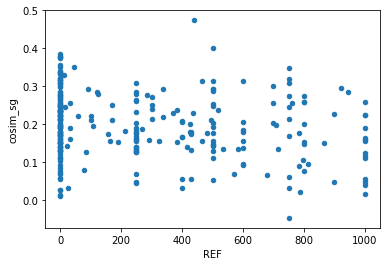

In [120]:
simp_overlap.plot(x = 'REF', y = 'cosim_sg', kind = 'scatter')


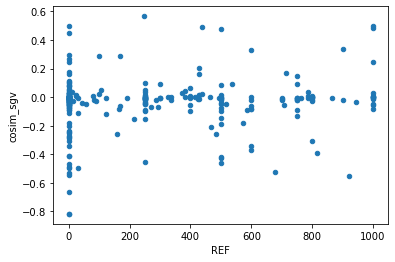

In [121]:
simp_overlap.plot(x = 'REF', y = 'cosim_sgv', kind = 'scatter')


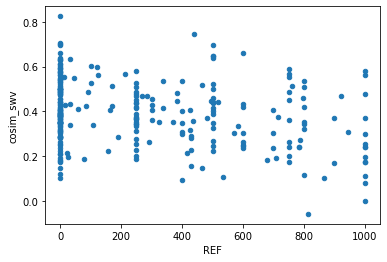

In [122]:
simp_overlap.plot(x = 'REF', y = 'cosim_swv', kind = 'scatter')

In [131]:
scorelist = ['cosim_sgv', 'cosim_sg', 'cosim_swv']

In [37]:
def get_corrs(df, cols, ref="REF", method = "pearson", mult = 1):
    outlist = []
    for c in cols:
        outlist.append( mult * df[ref].corr(df[c], method=method) )
    return outlist

In [135]:
get_corrs(simp_overlap, scorelist, mult = -1, method = "pearson")

[-0.09720148462999033, 0.19495947136848155, 0.2760342913074977]

In [136]:
get_corrs(simp_overlap, scorelist, mult = -1, method = "spearman")

[-0.034623818871246326, 0.18329474817928534, 0.2341824290760468]

In [38]:
def subcorrs(minref):
    sub = simp_overlap[simp_overlap.REF >= minref]
    
    outs = [len(sub)]
    outs.append(get_corrs(sub, scorelist, mult = -1, method = 'pearson'))
    outs.append(get_corrs(sub, scorelist, mult = -1, method = 'spearman'))
    
    return outs

In [139]:
get_corrs(simp_overlap[simp_overlap.REF >= 500], scorelist, mult = -1, method= "pearson")

[-0.2409532725581044, 0.1973874897625546, 0.32315277553705113]

In [141]:
subcorrs(500)

[77,
 [-0.2409532725581044, 0.1973874897625546, 0.32315277553705113],
 [-0.3096006715164736, 0.17898311442969775, 0.31329351000626554]]

In [146]:
for i in range(0, 1000, 100):
    print(i, subcorrs(i))

0 [274, [-0.09720148462999033, 0.19495947136848155, 0.2760342913074977], [-0.034623818871246326, 0.18329474817928534, 0.2341824290760468]]
100 [146, [-0.020127832012549314, 0.15098818202858724, 0.2915953010616968], [-0.0017050801797157838, 0.13068539620332414, 0.2710361390780452]]
200 [136, [-0.04621069759236261, 0.1203171279255027, 0.25735073875379055], [-0.022135630494109514, 0.09363304592289633, 0.23877768844712394]]
300 [106, [-0.06767613001017626, 0.20168546800475518, 0.2608367994200998], [0.03176605914419105, 0.18204648387395617, 0.23361890096519422]]
400 [96, [-0.10744864234784064, 0.1452900233011959, 0.22069693699417775], [-0.05740524084699931, 0.11011821536362727, 0.17713305397151788]]
500 [77, [-0.2409532725581044, 0.1973874897625546, 0.32315277553705113], [-0.3096006715164736, 0.17898311442969775, 0.31329351000626554]]
600 [56, [-0.25829091833150286, 0.14417899583067129, 0.18652600949980538], [-0.2866200788325487, 0.15255696559417314, 0.1845921967348338]]
700 [47, [-0.181720

Explore overlap between corpora - interesting that only c. 50% of the 150k from Simple also appear on the English lists

In [149]:
simp_comp = simp_res.merge(w10p_w2v, on='mwe', how = 'left')

In [248]:
simp_lost = simp_comp[np.isnan(simp_comp.batch_y)].reset_index(drop=True)
simp_kept = simp_comp[~np.isnan(simp_comp.batch_y)].reset_index(drop=True)

In [155]:
simp_lost

,mwe,freq,poisson_x,len_x,batch_x,stopwords_x,cosine_sim,base_nearest,mwe_nearest,component_cosims_x,poisson_y,len_y,batch_y,stopwords_y,component_cosims_y,cosim_10w
0,"(is, both, the)",35,-2568.582045,3,5,"[1, 0, 1]",-0.150264,"[[('was', 0.5867345333099365), ('are', 0.47631...","[('is+the+5th', 0.81363844871521), ('is+the+2n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(die, was)",37,-1847.535848,2,2,"[0, 1]",-0.149292,"[[('hurt', 0.6130431294441223), ('dying', 0.61...","[('two+terms+as', 0.676414966583252), ('Leahy'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(to, die, was)",37,-2539.934129,3,10,"[1, 0, 1]",-0.134621,"[[('would', 0.5098848938941956), ('ultimately'...","[('Agnew', 0.6467652320861816), ('Carnahan', 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(They, are, from)",34,-2384.293959,3,4,"[0, 1, 1]",-0.125547,"[[('they', 0.7551847696304321), ('These', 0.62...","[('Iowa+United+States', 0.81873619556427), ('B...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(but, the, one)",24,-1744.282143,3,9,"[0, 1, 1]",-0.125307,"[[('however', 0.8109905123710632), ('although'...","[('in+area+and', 0.6621363162994385), ('propul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75616,"(increment:1000, start:0, ScaleMinor)",36,-1604.864335,3,5,"[0, 0, 0]",0.970057,"[[('increment:2500+start:0+BackgroundColors', ...","[('increment:500+start:0+BackgroundColors', 0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75617,"(Maerz, and)",49,-2300.898593,2,3,"[0, 1]",0.973944,"[[('Maerz+and', 0.9739437103271484), ('PerBang...","[('Maerz', 0.9739437103271484), ('PerBang.dk',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75618,"(increment:50000, start:0, ScaleMinor)",46,-2038.355890,3,5,"[0, 0, 0]",0.981962,"[[('increment:50000+start:0+ScaleMinor', 0.995...","[('increment:25000', 0.9958760738372803), ('in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75619,"(increment:5000, start:0, ScaleMinor)",39,-1740.630231,3,5,"[0, 0, 0]",0.988815,"[[('increment:10000+start:0+ScaleMinor', 0.996...","[('increment:2500+start:0+BackgroundColors', 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
from scipy.stats import describe
describe(simp_lost.poisson_x)
describe(simp_lost.cosine_sim)
describe(simp_lost.len_x)
describe(simp_lost.stop_prop)

DescribeResult(nobs=75621, minmax=(0.0, 0.6666666666666666), mean=0.36513887235908904, variance=0.05602540685809013, skewness=-0.679720324359242, kurtosis=-1.1049623368710038)

In [274]:
describe(simp_kept.poisson_x)
describe(simp_kept.cosine_sim)
describe(simp_kept.len_x)
describe(simp_kept.stop_prop)

DescribeResult(nobs=68625, minmax=(0.0, 0.6666666666666666), mean=0.2890346083788707, variance=0.06951080750052767, skewness=0.10006109805680084, kurtosis=-1.5479206739185525)

In [266]:
simp_kept['stopwords_x'] = simp_kept.stopwords_x.apply(eval)
simp_lost['stopwords_x'] = simp_lost.stopwords_x.apply(eval)

In [263]:
simp_kept['stop_count'] = simp_kept.stopwords_x.apply(sum)
simp_kept['stop_prop'] = simp_kept.stop_count / simp_kept.len_x

In [267]:
simp_lost['stop_count'] = simp_lost.stopwords_x.apply(sum)
simp_lost['stop_prop'] = simp_lost.stop_count / simp_lost.len_x

In [268]:
indexer = 80

simp_lost[indexer:indexer+20]

,mwe,freq,poisson_x,len_x,batch_x,stopwords_x,cosine_sim,base_nearest,mwe_nearest,component_cosims_x,poisson_y,len_y,batch_y,stopwords_y,component_cosims_y,cosim_10w,stop_count,stop_prop
80,"(All, about)",32,-1571.108043,2,3,"[0, 0]",-0.025150,"[[('Both', 0.502296507358551), ('all', 0.48243...","[(""Bird's"", 0.8286581635475159), ('Castaways',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
81,"(be, got)",31,-1538.355421,2,4,"[1, 0]",-0.025039,"[[('otherwise', 0.618864119052887), ('remain',...","[('be+separated+from', 0.83689284324646), ('be...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.500000
82,"(a, first, person)",20,-1395.933065,3,5,"[1, 1, 0]",-0.024163,"[[('A', 0.5645163059234619), ('another', 0.554...","[('a+first-person+shooter', 0.8360457420349121...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.666667
83,"(on, show)",30,-1554.368984,2,4,"[1, 0]",-0.022112,"[[('On', 0.5995855331420898), ('upon', 0.46883...","[('Derby+Museum', 0.698961615562439), ('Kilmai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.500000
84,"(his, part)",60,-3062.830866,2,3,"[1, 0]",-0.021754,"[[('her', 0.6659896373748779), ('His', 0.62247...","[('attempted+murder', 0.6588592529296875), ('s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.500000
85,"(They, landed, on)",26,-1637.922261,3,5,"[0, 0, 1]",-0.021754,"[[('they', 0.7547893524169922), ('These', 0.65...","[('2012+28', 0.8698618412017822), ('2014+12', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.333333
86,"(their, second, run)",30,-1870.445396,3,6,"[1, 0, 0]",-0.021080,"[[(""people's"", 0.6504206657409668), (""one's"", ...","[('World+Book+Advanced', 0.6861727237701416), ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.333333
87,"(to, part)",27,-1470.749941,2,1,"[1, 0]",-0.020838,"[[('to+attempt', 0.5312680006027222), ('hoping...","[('to+join+them', 0.6446281671524048), ('to+st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.500000
88,"(any, Source)",23,-1012.774685,2,3,"[0, 0]",-0.020723,"[[('anything', 0.6359021663665771), ('anyone',...","[('Goodbye+Mr+Chips', 0.7604796886444092), ('L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
89,"(did, this, in)",26,-1805.176939,3,5,"[0, 0, 1]",-0.020611,"[[(""didn't"", 0.785071611404419), ('does', 0.70...","[('A+portrait+of', 0.6681976318359375), ('an+o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.333333


Overlap comparison - my main vs R&E

In [39]:
overlap = all_refs.merge(robegg_df[['mwe', 'compo', 'assoc']], on = 'mwe', how = 'left').merge(w10p_w2v, on = 'mwe', how = 'left')

In [40]:
overlap

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,compo,assoc,poisson,len,batch,stopwords,component_cosims,cosim_10w
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.259748,50.177542,NaN,NaN,NaN,NaN,NaN,NaN
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865,33.707865,0.280792,2213.100625,9213.434980,2.0,4.0,"[0, 0]","[0.22869545, 0.41104436]",0.319870
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.347889,129.053690,786.502926,2.0,7.0,"[0, 0]","[0.17964539, 0.50916576]",0.344406
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.482235,476.172511,2166.608913,2.0,4.0,"[0, 0]","[0.34746864, 0.7068063]",0.527137
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955,0.477018,953.269176,5106.729252,2.0,2.0,"[0, 0]","[0.5596013, 0.48271796]",0.521160


In [41]:
bs = ~np.isnan(overlap.compo) & ~np.isnan(overlap.poisson)
re = ~np.isnan(overlap.compo) & np.isnan(overlap.poisson)
me = np.isnan(overlap.compo) & ~np.isnan(overlap.poisson)
no = np.isnan(overlap.compo) & np.isnan(overlap.poisson)

both = overlap[bs]
robe = overlap[re]
mine = overlap[me]
none = overlap[no]

In [42]:
both

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,compo,assoc,poisson,len,batch,stopwords,component_cosims,cosim_10w
12,"(set, foot)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.022028,217.596888,1110.718885,2.0,1.0,"[0, 0]","[-0.05945925, 0.075642146]",0.008091
23,"(shake, hands)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.371771,173.998723,892.533399,2.0,1.0,"[0, 0]","[0.4794587, 0.19323903]",0.336349
29,"(shed, light)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.049574,278.918234,1491.011067,2.0,3.0,"[0, 0]","[0.06760876, 0.12713602]",0.097372
53,"(give, birth)",900.0,NaN,NaN,NaN,NaN,900.000000,0.394478,676.537847,3508.200498,2.0,2.0,"[0, 0]","[0.38342625, 0.36188853]",0.372657
58,"(take, part)",900.0,NaN,NaN,NaN,NaN,900.000000,0.231543,3038.128094,15109.522234,2.0,4.0,"[0, 0]","[0.45043194, 0.20595977]",0.328196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865,33.707865,0.280792,2213.100625,9213.434980,2.0,4.0,"[0, 0]","[0.22869545, 0.41104436]",0.319870
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.347889,129.053690,786.502926,2.0,7.0,"[0, 0]","[0.17964539, 0.50916576]",0.344406
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.482235,476.172511,2166.608913,2.0,4.0,"[0, 0]","[0.34746864, 0.7068063]",0.527137
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955,0.477018,953.269176,5106.729252,2.0,2.0,"[0, 0]","[0.5596013, 0.48271796]",0.521160


In [209]:
robe

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,compo,assoc,poisson,len,batch,stopwords,component_cosims,cosim_10w
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.259748,50.177542,NaN,NaN,NaN,NaN,NaN,NaN
14,"(change, hands)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.205690,57.705140,NaN,NaN,NaN,NaN,NaN,NaN
22,"(bear, fruit)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.268990,85.148290,NaN,NaN,NaN,NaN,NaN,NaN
43,"(keep, watch)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.436692,72.777805,NaN,NaN,NaN,NaN,NaN,NaN
61,"(see, fit)",900.0,NaN,NaN,NaN,NaN,900.000000,0.276481,67.360650,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,"(double, glazing)",NaN,NaN,NaN,NaN,235.955056,235.955056,0.378045,31.348033,NaN,NaN,NaN,NaN,NaN,NaN
1960,"(unlikely, event)",NaN,NaN,NaN,NaN,157.303371,157.303371,0.268045,30.692192,NaN,NaN,NaN,NaN,NaN,NaN
1962,"(special, occasion)",NaN,NaN,NaN,NaN,157.303371,157.303371,0.419895,47.619223,NaN,NaN,NaN,NaN,NaN,NaN
1973,"(sunny, day)",NaN,NaN,NaN,NaN,101.123596,101.123596,0.475922,50.982700,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
mine

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,compo,assoc,poisson,len,batch,stopwords,component_cosims,cosim_10w


In [211]:
none

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,compo,assoc,poisson,len,batch,stopwords,component_cosims,cosim_10w
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"(get, way)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,"(coastal, path)",NaN,NaN,NaN,NaN,112.359551,112.359551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,"(soft, toy)",NaN,NaN,NaN,NaN,101.123596,101.123596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,"(big, fish)",NaN,NaN,NaN,NaN,89.887640,89.887640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,"(written, examination)",NaN,NaN,NaN,NaN,89.887640,89.887640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
from scipy.stats import describe
describe(both.assoc)

DescribeResult(nobs=696, minmax=(43.5979829462, 36235.2033354), mean=823.0081091942777, variance=4189230.2196930684, skewness=9.979382718328198, kurtosis=142.7820827491496)

In [217]:
describe(robe.assoc)

DescribeResult(nobs=268, minmax=(21.732914125900002, 441.08014715699994), mean=53.582294561225744, variance=2136.2530146928493, skewness=5.339094919104353, kurtosis=34.668344255022326)

In [219]:
robe[robe.assoc > 100.597982946]

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,compo,assoc,poisson,len,batch,stopwords,component_cosims,cosim_10w
530,"(provide, services)",100.0,NaN,NaN,NaN,NaN,100.000000,0.617337,235.023555,NaN,NaN,NaN,NaN,NaN,NaN
748,"(teddy, bear)",NaN,750.0,NaN,NaN,NaN,750.000000,0.423539,379.224643,NaN,NaN,NaN,NaN,NaN,NaN
1181,"(seat, belt)",NaN,0.0,NaN,NaN,NaN,0.000000,0.270103,128.059882,NaN,NaN,NaN,NaN,NaN,NaN
1598,"(girls, school)",NaN,0.0,NaN,NaN,NaN,0.000000,0.537798,218.252536,NaN,NaN,NaN,NaN,NaN,NaN
1664,"(government, leaders)",NaN,0.0,NaN,NaN,NaN,0.000000,0.334125,441.080147,NaN,NaN,NaN,NaN,NaN,NaN
1788,"(shake, off)",NaN,NaN,NaN,571.428571,NaN,571.428571,0.347492,102.187443,NaN,NaN,NaN,NaN,NaN,NaN
1879,"(old, school)",NaN,NaN,NaN,NaN,707.865169,707.865169,0.451288,300.879254,NaN,NaN,NaN,NaN,NaN,NaN
1883,"(social, capital)",NaN,NaN,NaN,NaN,606.741573,606.741573,0.423516,100.898796,NaN,NaN,NaN,NaN,NaN,NaN
1929,"(retail, outlet)",NaN,NaN,NaN,NaN,325.842697,325.842697,0.528808,109.498869,NaN,NaN,NaN,NaN,NaN,NaN
1930,"(single, point)",NaN,NaN,NaN,NaN,325.842697,325.842697,0.376408,334.631687,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
w10p_w2v_raw = pd.read_csv(datapath+'/Models/1 w2v/Results/wiki10pc_light_001.csv', 
                       converters= converter
                      )

In [220]:
w10p_w2v[w10p_w2v.mwe == ('teddy', 'bear')]

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w


In [222]:
w10p_w2v_raw[w10p_w2v_raw.ngram == ('teddy', 'bear')]

,ngram,poisson,len,batch,stopwords,component_cosims,cosine_sim
492877,"(teddy, bear)",1745.004433,2,2,"[-1, 0]","[nan, 0.3509004]",NaN


In [224]:
w10p_w2v = pd.read_csv(datapath+'/Models/1 w2v/Results/wiki10pc_light_001.csv', 
                       converters= converter
                      )

In [239]:
errs = w10p_w2v[w10p_w2v.stopwords == '[-2]'].reset_index(drop=True)

In [245]:
len(errs)

354

In [244]:
indexer = 60

errs[indexer:indexer+20]

,ngram,poisson,len,batch,stopwords,component_cosims,cosine_sim
60,"(Nonominations, Nonominations, Nonominations)",719.748603,3,1,[-2],[],NaN
61,"(Directly, elected, Directly)",699.734426,3,1,[-2],[],NaN
62,"(R_B, Album)",699.059987,2,1,[-2],[],NaN
63,"(R_B, US, Rap)",694.826545,3,1,[-2],[],NaN
64,"(electrophilic, aromatic, substitution)",686.269179,3,1,[-2],[],NaN
65,"(Harriet, Beecher, Stowe's)",685.852894,3,1,[-2],[],NaN
66,"(XXXX, XXXX, XXXX)",684.920936,3,1,[-2],[],NaN
67,"(AT_T, Center18,418)",684.529334,2,1,[-2],[],NaN
68,"(Labial, Dental, Alveolar)",664.248063,3,1,[-2],[],NaN
69,"(YES, NO, YES)",643.000828,3,1,[-2],[],NaN


In [ ]:
w10p_w2v = w10p_w2v[~np.isnan(w10p_w2v.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_10w'}).reset_index(drop=True)

Compositionality and collocation

In [275]:
def corr_scores(inframe, comp, assoc = 'poisson', mult=-1):
    
    c_pears = inframe[comp].corr(inframe[assoc], method="pearson")
    c_spear = inframe[comp].corr(inframe[assoc], method="spearman")
        
    return (mult*c_spear, mult*c_pears)

In [276]:
corr_scores(robegg_df, 'compo', assoc='assoc', mult = 1)

(0.12584621327890244, 0.0375156117712529)

In [292]:
corr_scores(w10p_w2v, sc_dict['W2V_W10P'][1], assoc='poisson', mult = 1)

(0.21628413852134534, 0.05425450815874955)

In [294]:
sc_dict = {'RE_WIKI15' : (robegg_df,'compo','assoc',1),
           'W2V_SIMP20': (simp_res,'cosine_sim','poisson',1),
           'GLV_SIMP20_FULL': (simp_glv,'cosim_sg','poisson',1),
           'W2V_W10P'  : (w10p_w2v,'cosim_10w','poisson',1),
           'GLV_W10P'  : (w10p_glv,'cosim_10g','poisson',1),
           'GLV_SIMP20_REST': (simp_glv_v,'cosim_sgv','poisson',1),
          }

In [295]:
score_corr_results = {}

for gs in sc_dict.keys():
    score_corr_results[gs] = corr_scores( sc_dict[gs][0], sc_dict[gs][1], assoc = sc_dict[gs][2], mult = sc_dict[gs][-1] )
    
score_corr_results

{'RE_WIKI15': (0.12584621327890244, 0.0375156117712529),
 'W2V_SIMP20': (-0.034815644940729105, -0.05031206900237699),
 'GLV_SIMP20_FULL': (-0.121695931695767, -0.12179375978847985),
 'W2V_W10P': (0.21628413852134534, 0.05425450815874955),
 'GLV_W10P': (0.22194047436170414, 0.17367309187720498),
 'GLV_SIMP20_REST': (-0.006846720923217711, -0.016487294349174016)}

In [300]:
wiki_250 = w10p_w2v.sort_values('poisson', ascending = False).reset_index(drop=True)[0:250000]

In [301]:
wiki_250

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w
0,"(References, External, links)",2.566994e+06,3,1,"[0, 0, 0]","[0.93112254, 0.64820296, 0.4408434]",0.673390
1,"(External, links)",2.229096e+06,2,2,"[0, 0]","[0.32553053, 0.02728182]",0.176406
2,"(United, States)",1.564125e+06,2,1,"[0, 0]","[0.13059077, 0.3343389]",0.232465
3,"(the, United, States)",1.266638e+06,3,2,"[1, 0, 0]","[nan, 0.21978265, 0.3875841]",0.303683
4,"(New, York)",1.190652e+06,2,1,"[1, 0]","[nan, 0.42115185]",0.421152
...,...,...,...,...,...,...,...
249995,"(Indian, culture)",6.797723e+02,2,1,"[0, 0]","[0.4082861, 0.65285325]",0.530570
249996,"(cartoon, characters)",6.797706e+02,2,1,"[0, 0]","[0.54492223, 0.5811666]",0.563044
249997,"(king, my)",6.797696e+02,2,7,"[0, 0]","[0.3574685, 0.47743967]",0.417454
249998,"(This, protein)",6.797693e+02,2,2,"[0, 0]","[0.34410492, 0.68433464]",0.514220


In [303]:
corr_scores(wiki_250, 'cosim_10w', assoc='poisson', mult = 1)

(0.1643105520753334, 0.04308733496033615)

In [296]:
simp_glv

,mwe,freq,poisson,len,batch,stopwords,component_cosims,cosim_sg
0,"(at, SourceWatch)",29,-1242.296116,2,1,"[1, 0]","[nan, -0.6189176361829742]",-0.618918
1,"(Verde, River)",21,-934.113534,2,1,"[0, 0]","[-0.27860416326513254, -0.9082974293747117]",-0.593451
2,"(Preto, River)",26,-1082.078752,2,1,"[0, 0]","[-0.05813242429839234, -0.9069972245533662]",-0.482565
3,"(B-2, B-2)",23,-781.295338,2,1,"[0, 0]","[-0.4782236263161076, -0.4782236263161076]",-0.478224
4,"(a, sex-ratio)",39,-1756.174658,2,1,"[1, 0]","[nan, -0.42406098156680977]",-0.424061
...,...,...,...,...,...,...,...,...
148280,"(Bidi, Bom)",28,-933.795170,2,2,"[0, 0]","[0.9441158251036129, 0.8859746218160154]",0.915045
148281,"(OppositionScore, OppositionScore)",24,-752.985334,2,1,"[0, 0]","[0.9284973927698434, 0.9284973927698434]",0.928497
148282,"(Yuta, Iyama, Yuta)",27,-1035.776620,3,3,"[0, 0, 0]","[0.9354143888603338, 0.980728978874779, 0.9354...",0.950519
148283,"(Iyama, Yuta, Iyama)",27,-1026.568623,3,2,"[0, 0, 0]","[0.966807948593367, 0.9500962208719715, 0.9668...",0.961237


In [297]:
simp_res

,mwe,freq,poisson,len,batch,stopwords,cosine_sim,base_nearest,mwe_nearest,component_cosims
0,"(and, finally, the)",33,-2347.493609,3,4,"[1, 0, 1]",-0.166870,"[[('but', 0.46513259410858154), ('which', 0.46...","[('Archeology', 0.7114355564117432), ('It+serv...",NaN
1,"(was, born, here)",32,-2114.989504,3,7,"[1, 1, 0]",-0.162483,"[[('is', 0.599123477935791), ('became', 0.4980...","[('né', 0.8346260786056519), ('Swiss-born', 0....",NaN
2,"(and, most, recently)",39,-2537.673195,3,6,"[1, 0, 0]",-0.155851,"[[('which', 0.48842793703079224), ('but', 0.48...","[('Videography', 0.767510712146759), ('Demos',...",NaN
3,"(is, both, the)",35,-2568.582045,3,5,"[1, 0, 1]",-0.150264,"[[('was', 0.5867345333099365), ('are', 0.47631...","[('is+the+5th', 0.81363844871521), ('is+the+2n...",NaN
4,"(die, was)",37,-1847.535848,2,2,"[0, 1]",-0.149292,"[[('hurt', 0.6130431294441223), ('dying', 0.61...","[('two+terms+as', 0.676414966583252), ('Leahy'...",NaN
...,...,...,...,...,...,...,...,...,...,...
144241,"(increment:1000, start:0, ScaleMinor)",36,-1604.864335,3,5,"[0, 0, 0]",0.970057,"[[('increment:2500+start:0+BackgroundColors', ...","[('increment:500+start:0+BackgroundColors', 0....",NaN
144242,"(Maerz, and)",49,-2300.898593,2,3,"[0, 1]",0.973944,"[[('Maerz+and', 0.9739437103271484), ('PerBang...","[('Maerz', 0.9739437103271484), ('PerBang.dk',...",NaN
144243,"(increment:50000, start:0, ScaleMinor)",46,-2038.355890,3,5,"[0, 0, 0]",0.981962,"[[('increment:50000+start:0+ScaleMinor', 0.995...","[('increment:25000', 0.9958760738372803), ('in...",NaN
144244,"(increment:5000, start:0, ScaleMinor)",39,-1740.630231,3,5,"[0, 0, 0]",0.988815,"[[('increment:10000+start:0+ScaleMinor', 0.996...","[('increment:2500+start:0+BackgroundColors', 0...",NaN


Movement from 2015 Wiki to 2020

In [43]:
wikirows = w10p_w2v.merge(robegg_df, on = 'mwe', how = 'outer')
old = wikirows[np.isnan(wikirows.poisson)]
new = wikirows[np.isnan(wikirows.assoc)]

In [59]:
shared = wikirows[~np.isnan(wikirows.poisson)]
shared = shared[~np.isnan(shared.assoc)]

In [44]:
old

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
453469,"(this, individual, as)",NaN,NaN,NaN,NaN,NaN,NaN,-0.216884,452.575930,NaN,-0.216884,NaN
453470,"(individual, as, the)",NaN,NaN,NaN,NaN,NaN,NaN,-0.161933,191.902424,-0.161933,NaN,NaN
453471,"(It, returned, one)",NaN,NaN,NaN,NaN,NaN,NaN,-0.160100,49.378076,NaN,-0.160100,NaN
453472,"(in, its, day)",NaN,NaN,NaN,NaN,NaN,NaN,-0.130559,28.248862,NaN,NaN,-0.130559
453473,"(style, display, none)",NaN,NaN,NaN,NaN,NaN,NaN,-0.130268,2930.072364,-0.128497,-0.091829,-0.170478
...,...,...,...,...,...,...,...,...,...,...,...,...
1023030,"(ް, މ)",NaN,NaN,NaN,NaN,NaN,NaN,0.936950,25.932951,0.948078,0.925822,NaN
1023031,"(ވ, ަ)",NaN,NaN,NaN,NaN,NaN,NaN,0.940034,32.194828,0.923682,0.956386,NaN
1023032,"(Records, and)",NaN,NaN,NaN,NaN,NaN,NaN,0.946745,143.658118,0.946745,NaN,NaN
1023033,"(މ, ަ)",NaN,NaN,NaN,NaN,NaN,NaN,0.946882,67.013677,0.936615,0.957148,NaN


In [45]:
indexer = 80

new[indexer:indexer+20]

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
136,"(11.5%, had, someone)",533.498381,3.0,3.0,"[0, 1, 0]","[-0.0289137, nan, -0.1585635]",-0.093739,NaN,NaN,NaN,NaN,NaN
143,"(together, 6.3%, had)",682.061033,3.0,6.0,"[0, 0, 1]","[-0.2502162, 0.06565213, nan]",-0.092282,NaN,NaN,NaN,NaN,NaN
144,"(living, together, 12.2%)",540.117628,3.0,7.0,"[0, 0, 0]","[-0.14243248, -0.22989593, 0.095815524]",-0.092171,NaN,NaN,NaN,NaN,NaN
146,"(cap, opponent)",723.563784,2.0,4.0,"[0, 0]","[-0.13052869, -0.05278854]",-0.091659,NaN,NaN,NaN,NaN,NaN
149,"(6.3%, had, someone)",555.211596,3.0,3.0,"[0, 1, 0]","[0.025039783, nan, -0.20694304]",-0.090952,NaN,NaN,NaN,NaN,NaN
156,"(living, people, in)",732.735095,3.0,1.0,"[0, 0, 1]","[-0.11132099, -0.06738959, nan]",-0.089355,NaN,NaN,NaN,NaN,NaN
158,"(or, practice, time)",1716.014228,3.0,1.0,"[1, 0, 0]","[nan, -0.10488419, -0.073431894]",-0.089158,NaN,NaN,NaN,NaN,NaN
159,"(1920s, 1930s, 1940s)",444.903895,3.0,8.0,"[0, 0, 0]","[-0.10678976, -0.105187126, -0.05546279]",-0.089147,NaN,NaN,NaN,NaN,NaN
160,"(8.6%, had, someone)",665.889689,3.0,3.0,"[0, 1, 0]","[-0.023669116, nan, -0.15448642]",-0.089078,NaN,NaN,NaN,NaN,NaN
161,"(living, together, 5.6%)",580.679062,3.0,7.0,"[0, 0, 0]","[-0.12135211, -0.2272546, 0.08141958]",-0.089062,NaN,NaN,NaN,NaN,NaN


In [46]:
new

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
0,"(1980s, 1970s, 1960s)",504.762099,3.0,8.0,"[0, 0, 0]","[-0.23996054, -0.23782371, -0.2340202]",-0.237268,NaN,NaN,NaN,NaN,NaN
2,"(European, register, of)",588.560764,3.0,1.0,"[0, 0, 1]","[-0.1621425, -0.21278596, nan]",-0.187464,NaN,NaN,NaN,NaN,NaN
3,"(1950s, 1940s, 1930s)",576.491489,3.0,10.0,"[0, 0, 0]","[-0.18906975, -0.1606813, -0.19921347]",-0.182988,NaN,NaN,NaN,NaN,NaN
4,"(As, far, back)",449.645748,3.0,3.0,"[0, 0, 0]","[-0.09595686, -0.2087354, -0.24125503]",-0.181982,NaN,NaN,NaN,NaN,NaN
5,"(1, time, with)",2903.480098,3.0,4.0,"[1, 0, 1]","[nan, -0.17919368, nan]",-0.179194,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
453464,"(宿, け/犬)",416.659769,2.0,2.0,"[0, 0]","[0.9859951, 0.9874592]",0.986727,NaN,NaN,NaN,NaN,NaN
453465,"(ㄴ, ㄹ)",4110.216943,2.0,5.0,"[0, 0]","[0.98334867, 0.99101293]",0.987181,NaN,NaN,NaN,NaN,NaN
453466,"(ㄹ, ㅁ)",3227.287802,2.0,6.0,"[0, 0]","[0.99340194, 0.98948646]",0.991444,NaN,NaN,NaN,NaN,NaN
453467,"(ㄹ, ㅁ, ㅂ)",5594.044824,3.0,4.0,"[0, 0, 0]","[0.9960094, 0.99351, 0.9925519]",0.994024,NaN,NaN,NaN,NaN,NaN


In [18]:
# Remove POS tags from tuples for matching

import re

pipematcher = re.compile("(.*)\|")
pipematch2 = re.compile("(\|[A-Z]{2,4}\$?|[\$\:,\.\"]|``|\-LRB\-?|\-RRB\-?)")

def g1(matchobj):
    return matchobj.group(1)

def tup_matcher(tupstr, pattern=pipematcher):
    ot = []
    for w in tupstr:
        if w == '|HYPH': w = '-|HYPH'
        if re.match(pattern, w):
            ot.append(g1(pattern.match(w)))
    return tuple(ot)


def tup_rem(tupstr, pattern=pipematch2):
    ot = []
    for w in tupstr:
        if w == '|HYPH': w = '-|HYPH'
        ot.append(re.sub(pattern,'',w))
    return tuple(ot)

nums = re.compile("\d")

def tup_any(tup, pattern=nums):
    for w in tup:
        if re.search(pattern,w): return True
    return False

In [52]:
new_nonum = new[~new.mwe.apply(tup_any)].reset_index(drop=True)

In [53]:
new_nonum

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
0,"(European, register, of)",588.560764,3.0,1.0,"[0, 0, 1]","[-0.1621425, -0.21278596, nan]",-0.187464,NaN,NaN,NaN,NaN,NaN
1,"(As, far, back)",449.645748,3.0,3.0,"[0, 0, 0]","[-0.09595686, -0.2087354, -0.24125503]",-0.181982,NaN,NaN,NaN,NaN,NaN
2,"(keeping, him, until)",421.636998,3.0,5.0,"[0, 0, 0]","[-0.18346253, -0.25118205, -0.083142444]",-0.172596,NaN,NaN,NaN,NaN,NaN
3,"(official, government, website)",498.320394,3.0,1.0,"[0, 0, 0]","[-0.18726544, -0.3018695, -0.018630387]",-0.169255,NaN,NaN,NaN,NaN,NaN
4,"(January, February, March)",479.715644,3.0,3.0,"[0, 0, 0]","[-0.18026352, -0.17878881, -0.14444213]",-0.167831,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
79591,"(宿, け/犬)",416.659769,2.0,2.0,"[0, 0]","[0.9859951, 0.9874592]",0.986727,NaN,NaN,NaN,NaN,NaN
79592,"(ㄴ, ㄹ)",4110.216943,2.0,5.0,"[0, 0]","[0.98334867, 0.99101293]",0.987181,NaN,NaN,NaN,NaN,NaN
79593,"(ㄹ, ㅁ)",3227.287802,2.0,6.0,"[0, 0]","[0.99340194, 0.98948646]",0.991444,NaN,NaN,NaN,NaN,NaN
79594,"(ㄹ, ㅁ, ㅂ)",5594.044824,3.0,4.0,"[0, 0, 0]","[0.9960094, 0.99351, 0.9925519]",0.994024,NaN,NaN,NaN,NaN,NaN


In [56]:
social = re.compile("social")

new_soc = new[new.mwe.apply(tup_any,pattern=social)]

new_soc

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
12326,"(social, services, zoning)",523.616937,3.0,10.0,"[0, 0, 0]","[0.10309831, 0.12479119, 0.10763213]",0.111841,NaN,NaN,NaN,NaN,NaN
17194,"(for, social, cultural)",1779.165444,3.0,6.0,"[1, 0, 0]","[nan, 0.113745615, 0.15323842]",0.133492,NaN,NaN,NaN,NaN,NaN
19711,"(social, media, pages)",602.373983,3.0,3.0,"[0, 0, 0]","[0.058553554, 0.1981657, 0.17170377]",0.142808,NaN,NaN,NaN,NaN,NaN
23467,"(social, media, that)",772.259523,3.0,3.0,"[0, 0, 1]","[0.09113248, 0.21859607, nan]",0.154864,NaN,NaN,NaN,NaN,NaN
30554,"(a, social, club)",475.468261,3.0,2.0,"[1, 0, 0]","[nan, 0.10541827, 0.24304649]",0.174232,NaN,NaN,NaN,NaN,NaN
33222,"(her, social, media)",545.615230,3.0,8.0,"[1, 0, 0]","[nan, 0.11202614, 0.24947596]",0.180751,NaN,NaN,NaN,NaN,NaN
35432,"(Corporate, social, responsibility)",507.468825,3.0,2.0,"[0, 0, 0]","[0.4793663, 0.044996, 0.033258643]",0.185874,NaN,NaN,NaN,NaN,NaN
37496,"(social, distancing)",719.485717,2.0,1.0,"[0, 0]","[0.20755494, 0.1729506]",0.190253,NaN,NaN,NaN,NaN,NaN
41284,"(For, social, welfare)",698.756252,3.0,4.0,"[0, 0, 0]","[0.16761032, 0.2060716, 0.22052798]",0.198070,NaN,NaN,NaN,NaN,NaN
49326,"(Wales, for, social)",681.820235,3.0,4.0,"[0, 1, 0]","[0.3454227, nan, 0.08067066]",0.213047,NaN,NaN,NaN,NaN,NaN


In [65]:
shared_soc = shared[shared.mwe.apply(tup_any,pattern=social)].reset_index(drop=True)


In [66]:
indexer = 0
shared_soc[indexer:indexer+30]

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
0,"(private, social, clubs)",435.788230,3.0,8.0,"[0, 0, 0]","[0.03225793, -0.07298092, -0.1600177]",-0.066914,0.182398,64.556741,0.289216,0.172304,0.085674
1,"(burial, private, social)",457.470929,3.0,2.0,"[0, 0, 0]","[-0.0855438, -0.053480264, -0.058718883]",-0.065914,0.123544,70.091580,0.062050,0.230176,0.078407
2,"(social, clubs, charitable)",483.619493,3.0,3.0,"[0, 0, 0]","[-0.079403125, -0.106942415, 0.025450826]",-0.053632,0.113470,76.663067,0.053549,0.088486,0.198373
3,"(social, welfare, contribution)",439.988681,3.0,3.0,"[0, 0, 0]","[0.053167038, 0.11966098, -0.083221585]",0.029869,0.022020,37.999594,-0.009924,0.096044,-0.020059
4,"(group, for, social)",683.081849,3.0,2.0,"[0, 1, 0]","[-0.010581096, nan, 0.097421475]",0.043420,0.165175,22.787699,0.143148,NaN,0.187202
5,"(on, social, networks)",444.953265,3.0,10.0,"[1, 0, 0]","[nan, 0.17600468, 0.12762745]",0.151816,0.340761,31.339100,NaN,0.362721,0.318801
6,"(education, social, services)",1010.739920,3.0,5.0,"[0, 0, 0]","[0.15398517, 0.0762159, 0.24547158]",0.158558,0.158691,102.033675,0.138029,0.051939,0.286105
7,"(social, networking, services)",534.311300,3.0,3.0,"[0, 0, 0]","[0.07281355, 0.33011192, 0.11941961]",0.174115,0.369720,58.361028,0.343861,0.526316,0.238984
8,"(and, social, work)",605.530240,3.0,6.0,"[1, 0, 0]","[nan, 0.25534955, 0.10412837]",0.179739,0.202928,52.363256,NaN,0.301970,0.103887
9,"(higher, social, status)",481.168360,3.0,4.0,"[0, 0, 0]","[0.2481569, 0.11028713, 0.21630234]",0.191582,0.415488,37.188701,0.391724,0.352554,0.502186


In [58]:
fake = re.compile("fake")

old_fake = old[old.mwe.apply(tup_any,pattern=fake)]

old_fake

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
497281,"(fake, field, goal)",NaN,NaN,NaN,NaN,NaN,NaN,0.223289,40.039306,0.139807,0.182664,0.347397
667025,"(a, fake, punt)",NaN,NaN,NaN,NaN,NaN,NaN,0.392713,31.177631,NaN,0.134448,0.650978
680666,"(fake, punt)",NaN,NaN,NaN,NaN,NaN,NaN,0.401709,49.964190,0.145169,0.658249,NaN
730650,"(fakes, his)",NaN,NaN,NaN,NaN,NaN,NaN,0.432794,22.441101,0.432794,NaN,NaN
761523,"(fake, ID)",NaN,NaN,NaN,NaN,NaN,NaN,0.451706,30.149213,0.505780,0.397632,NaN
776966,"(fake, blood)",NaN,NaN,NaN,NaN,NaN,NaN,0.461183,37.364693,0.462813,0.459553,NaN
823898,"(fake, passport)",NaN,NaN,NaN,NaN,NaN,NaN,0.490694,32.666592,0.436277,0.545111,NaN
943399,"(is, a, fake)",NaN,NaN,NaN,NaN,NaN,NaN,0.591471,22.818694,NaN,NaN,0.591471
1014150,"(had, faked)",NaN,NaN,NaN,NaN,NaN,NaN,0.755597,25.364016,NaN,0.755597,NaN


In [61]:
shared_fake = shared[shared.mwe.apply(tup_any,pattern=fake)]

shared_fake

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
96398,"(faked, his, own)",444.601516,3.0,2.0,"[0, 1, 0]","[0.5628634, nan, -0.0069758324]",0.277944,0.346444,39.643699,0.579656,NaN,0.113233
152287,"(faked, his, death)",729.180867,3.0,2.0,"[0, 1, 0]","[0.40324265, nan, 0.26529735]",0.334270,0.397769,74.370797,0.518457,NaN,0.277080
259319,"(fake, news)",934.122286,2.0,2.0,"[0, 0]","[0.32141405, 0.5440531]",0.432734,0.515163,24.075337,0.391093,0.639234,NaN
322019,"(with, a, fake)",413.020192,3.0,3.0,"[1, 1, 0]","[nan, nan, 0.49806476]",0.498065,0.658207,31.673515,NaN,NaN,0.658207
419872,"(faked, his)",441.223875,2.0,3.0,"[0, 1]","[0.6648538, nan]",0.664854,0.646256,80.048496,0.646256,NaN,NaN
424916,"(a, fake)",2334.224439,2.0,1.0,"[1, 0]","[nan, 0.6792863]",0.679286,0.750568,383.147358,NaN,0.750568,NaN


In [62]:
shared_soc = shared[shared.mwe.apply(tup_any,pattern=social)]

shared_soc

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w,compo,assoc,w1,w2,w3
332,"(private, social, clubs)",435.788230,3.0,8.0,"[0, 0, 0]","[0.03225793, -0.07298092, -0.1600177]",-0.066914,0.182398,64.556741,0.289216,0.172304,0.085674
339,"(burial, private, social)",457.470929,3.0,2.0,"[0, 0, 0]","[-0.0855438, -0.053480264, -0.058718883]",-0.065914,0.123544,70.091580,0.062050,0.230176,0.078407
449,"(social, clubs, charitable)",483.619493,3.0,3.0,"[0, 0, 0]","[-0.079403125, -0.106942415, 0.025450826]",-0.053632,0.113470,76.663067,0.053549,0.088486,0.198373
2793,"(social, welfare, contribution)",439.988681,3.0,3.0,"[0, 0, 0]","[0.053167038, 0.11966098, -0.083221585]",0.029869,0.022020,37.999594,-0.009924,0.096044,-0.020059
3661,"(group, for, social)",683.081849,3.0,2.0,"[0, 1, 0]","[-0.010581096, nan, 0.097421475]",0.043420,0.165175,22.787699,0.143148,NaN,0.187202
...,...,...,...,...,...,...,...,...,...,...,...,...
438982,"(social, and)",2030.843838,2.0,5.0,"[0, 1]","[0.7303022, nan]",0.730302,0.822725,84.222748,0.822725,NaN,NaN
443563,"(their, social)",720.180114,2.0,4.0,"[1, 0]","[nan, 0.75294983]",0.752950,0.728041,79.852527,NaN,0.728041,NaN
446100,"(and, socially)",418.730631,2.0,6.0,"[1, 0]","[nan, 0.768713]",0.768713,0.827612,70.705928,NaN,0.827612,NaN
449692,"(socialism, and)",416.580310,2.0,3.0,"[0, 1]","[0.7981273, nan]",0.798127,0.830377,58.994113,0.830377,NaN,NaN


In [69]:
w10p_nonum = w10p_w2v[~w10p_w2v.mwe.apply(tup_any)].reset_index(drop=True)

In [94]:
indexer = 40120

w10p_nonum[indexer:indexer+20]

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w
40120,"(his, fifth, studio)",540.425953,3,6,"[1, 0, 0]","[nan, 0.16344962, 0.24313855]",0.203294
40121,"(posted, speed, limit)",655.302019,3,5,"[0, 0, 0]","[-0.053132698, 0.33015597, 0.3328713]",0.203298
40122,"(and, transmitter, facilities)",428.303486,3,6,"[1, 0, 0]","[nan, 0.34668952, 0.05991128]",0.203300
40123,"(The, Soviet, Union's)",483.257332,3,2,"[1, 0, 0]","[nan, 0.21761027, 0.18899629]",0.203303
40124,"(established, themselves, in)",859.195338,3,6,"[0, 0, 1]","[0.28341505, 0.12320873, nan]",0.203312
40125,"(height, of, his)",1033.212356,3,7,"[0, 1, 1]","[0.20331326, nan, nan]",0.203313
40126,"(Final, Final, Best)",548.188526,3,3,"[0, 0, 0]","[0.24420622, 0.24420622, 0.12153201]",0.203315
40127,"(United, States, market)",405.753097,3,5,"[0, 0, 0]","[0.12100524, 0.1252794, 0.3636642]",0.203316
40128,"(a, South, American)",586.358067,3,10,"[1, 0, 0]","[nan, 0.13841407, 0.26821893]",0.203317
40129,"(forty-four, and, sixty)",1144.030745,3,1,"[0, 1, 0]","[0.24744307, nan, 0.15919219]",0.203318


Examples

In [42]:
egs = re.compile("flotsam")

eg = w10p_w2v[w10p_w2v.mwe.apply(tup_any,pattern=egs)]

eg

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w


In [26]:
w10p_w2v.loc[390737]

mwe                          (fairy, tale)
poisson                            7223.36
len                                      2
batch                                    1
stopwords                           [0, 0]
component_cosims    [0.4911234, 0.7049589]
cosim_10w                         0.598041
Name: 390737, dtype: object